### Titanic Dataset Description for Kaggle Competition:

The Titanic dataset is a collection of three CSV files: Test.csv, Train.csv, and gender_submission.csv. This dataset is commonly used for machine learning and data analysis competitions, particularly on platforms like Kaggle. It contains information about passengers aboard the RMS Titanic during its tragic maiden voyage in April 1912.

1. Test.csv:

    File Description: This file contains a subset of the Titanic dataset and is typically used for testing the performance of machine learning models.
    Columns:
        PassengerId: Unique identifier for each passenger in the test set.
        Pclass: Passenger class, representing the socio-economic status of the passenger (1 = 1st class, 2 = 2nd class, 3 = 3rd class).
        Name: Full name of the passenger.

2. Train.csv:

    File Description: This is the main training dataset used to build and train machine learning models.
    Columns:
        PassengerId: Unique identifier for each passenger in the training set.
        Survived: Target variable, indicating whether the passenger survived or not (0 = No, 1 = Yes).
        Pclass: Passenger class, representing the socio-economic status of the passenger (1 = 1st class, 2 = 2nd class, 3 = 3rd class).
        Name: Full name of the passenger.

3. gender_submission.csv:

    File Description: This file provides a template for submitting predictions to the Kaggle competition. It contains the PassengerId and an initial placeholder for the Survived column.
    Columns:
        PassengerId: Unique identifier for each passenger in the submission set.
        Survived: Initial placeholder for the submission of predicted survival outcomes (0 = No, 1 = Yes).

### Dataset Context:
The Titanic dataset is often used as a beginner's dataset for exploring data analysis and machine learning techniques. The main objective of the Kaggle competition based on this dataset is to build predictive models that can accurately determine the survival outcome of passengers based on various features like passenger class, age, sex, and more.

### Features and Target Variable:
The primary target variable is "Survived" in the Train.csv file, indicating whether a passenger survived or not. The features used to predict survival include "Pclass," "Name," and possibly additional features available in other datasets or after feature engineering.

### Data Exploration:
To gain insights into the dataset and prepare for modeling, participants in the Kaggle competition can perform exploratory data analysis (EDA) to understand the distribution of survival outcomes and the relationship between various features and survival rates.

### Data Preprocessing:
Before training machine learning models, some typical data preprocessing steps may include handling missing values, encoding categorical variables (such as passenger class), and possibly feature engineering based on the passenger names (e.g., extracting titles like "Mr.," "Mrs.," "Dr.," etc.).

### Modeling:
Participants can use various machine learning algorithms like logistic regression, decision trees, random forests, gradient boosting, or even deep learning models to predict survival outcomes based on the provided features.

### Evaluation:
The performance of the models will be assessed using accuracy, precision, recall, F1-score, or the area under the receiver operating characteristic curve (AUC-ROC) to determine the most effective model.

### Submission:
After training their models using the Train.csv data, participants can use the Test.csv dataset to make predictions for the survival outcomes of passengers. The predictions should be submitted in the format specified in the gender_submission.csv file.

Overall, the Titanic dataset provides an excellent opportunity for participants to practice their data analysis and machine learning skills in a real-world scenario, simulating the tragedy that unfolded during the Titanic's ill-fated voyage.

## Importing necessary libraries

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import warnings
warnings.filterwarnings("ignore")   #This code will suppress all warning messages from being displayed.

## Load dataset

In [33]:
train_df = pd.read_csv('/kaggle/input/titanic/train.csv')
test_df = pd.read_csv('/kaggle/input/titanic/test.csv')
gender_submission_df = pd.read_csv('/kaggle/input/titanic/gender_submission.csv')

## Exploratory Data Analysis (EDA)

In [34]:
#Explore train dataset
print(train_df.head())     #Display first row train dataset
print(train_df.info())     #Get information about dataset

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

In [35]:
#Explore test dataset
print(test_df.head())    #Display first row
print(test_df.info())    #Get information about dataset

   PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       ------------

## Explore target variable
The purpose of this visualization is to show the distribution of survival outcomes in the dataset, giving an overview of how many passengers survived and how many did not.

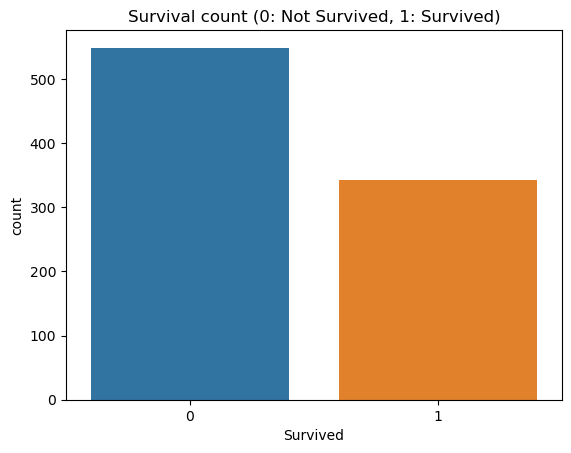

In [36]:
sns.countplot(x='Survived', data=train_df)
plt.title('Survival count (0: Not Survived, 1: Survived)')
plt.show()

## Explore the survival rate by passenger class
This visualization aims to provide insights into whether passenger class had any influence on survival rates. It can help us understand if there were any disparities in survival rates based on the class in which the passengers traveled. For instance, we might observe that certain classes had a higher likelihood of survival compared to others.

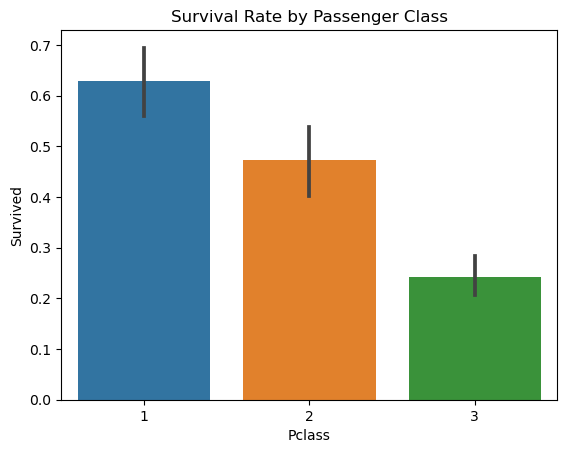

In [37]:
sns.barplot(x='Pclass', y='Survived', data=train_df)
plt.title('Survival Rate by Passenger Class')
plt.show()

## Explore the survival rate by gender
This visualization aims to provide insights into whether gender had any influence on survival rates. It can help us understand if there were any disparities in survival rates based on gender. For example, we might observe that one gender had a higher likelihood of survival compared to the other. Such information could be relevant in understanding potential biases or differences in the rescue and evacuation process during the event under consideration.

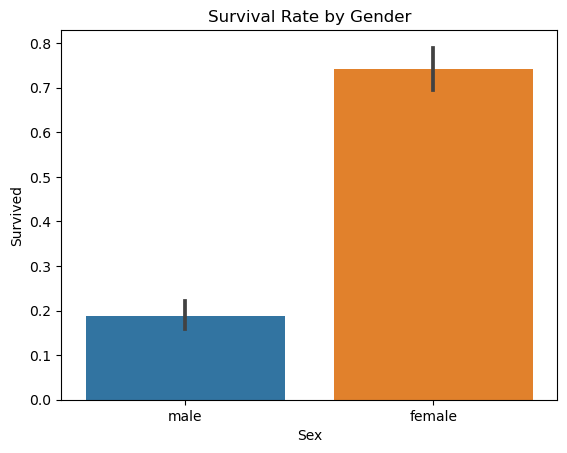

In [38]:
sns.barplot(x='Sex', y='Survived', data=train_df)
plt.title('Survival Rate by Gender')
plt.show()

## Correlation Heatmap
The resulting heatmap will show a grid of colored squares, where each square represents the correlation between two variables. The color intensity and shade indicate the strength and direction of the correlation. Positive correlations are shown in red shades, while negative correlations are shown in blue shades. A darker color indicates a stronger correlation. The diagonal line will be fully red since it represents the correlation of each variable with itself (which is always perfect correlation, i.e., 1.0).

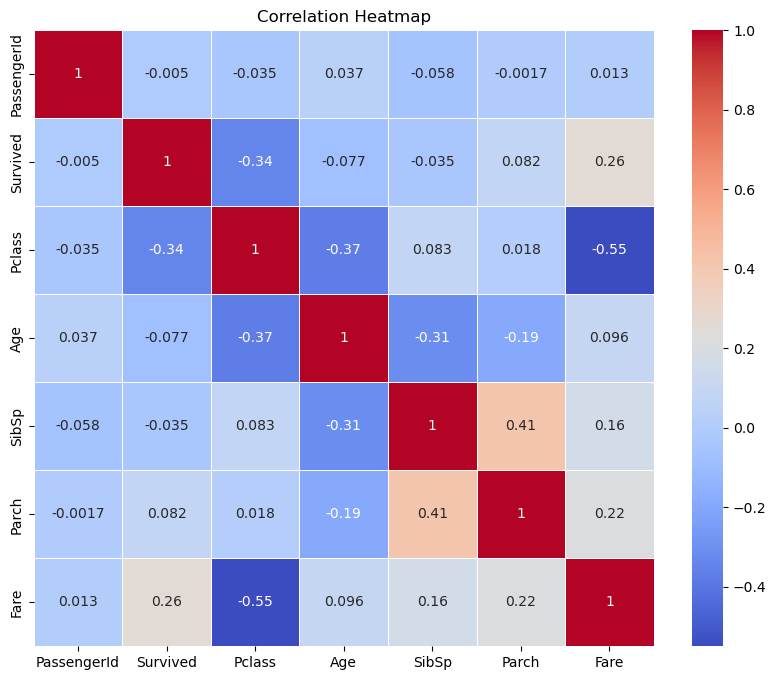

In [39]:
plt.figure(figsize=(10,8))
sns.heatmap(train_df.corr(), annot=True, cmap='coolwarm', linewidth=0.5)
plt.title('Correlation Heatmap')
plt.show()

## Pairplot
The resulting pairplot will show a grid of scatterplots, where each plot represents the relationship between two numerical features. The diagonal of the grid will show kernel density plots for each individual feature. Data points will be colored differently based on the 'Survived' variable, allowing us to visually assess how different numerical features relate to each other and how they might be associated with the survival outcome. By analyzing the pairplot, patterns and trends in the data can be identified, helping to understand which features might have a significant impact on survival.


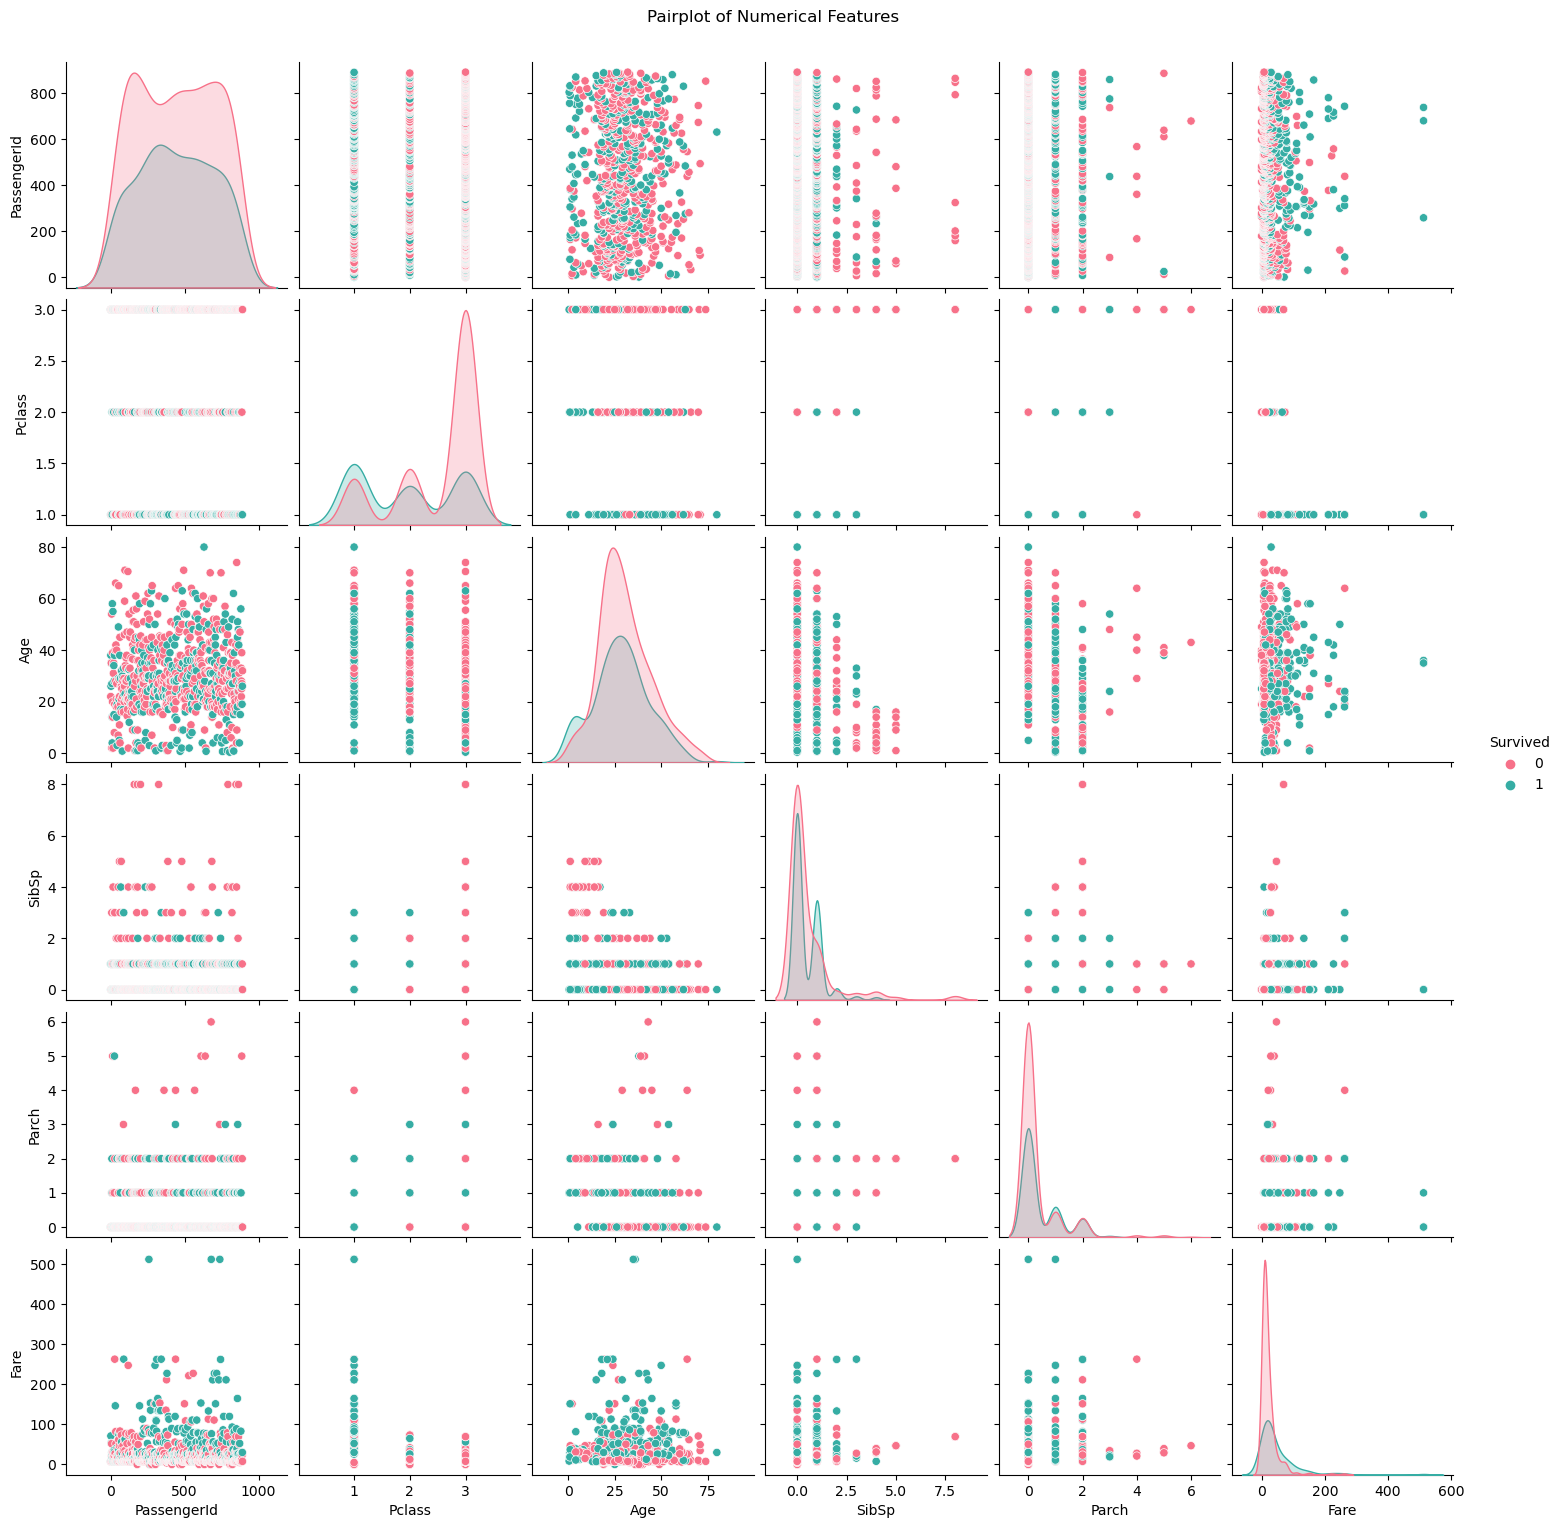

In [40]:
sns.pairplot(train_df, hue='Survived', palette='husl')
plt.suptitle('Pairplot of Numerical Features', y=1.02)
plt.show()

#The value 1.02 is a relative position; it means the title will be positioned 1.02 times the height of the plot area above the top of the grid.

## Histogram plot : Age Distribution by Survived
The resulting plot will show a histogram of the 'Age' distribution, with the KDE overlaid, and the bars will be differentiated by color, representing the 'Not Survived' and 'Survived' groups. The plot provides insights into the age distribution of passengers who survived and those who did not, allowing us to observe any patterns or trends related to age and survival outcomes.

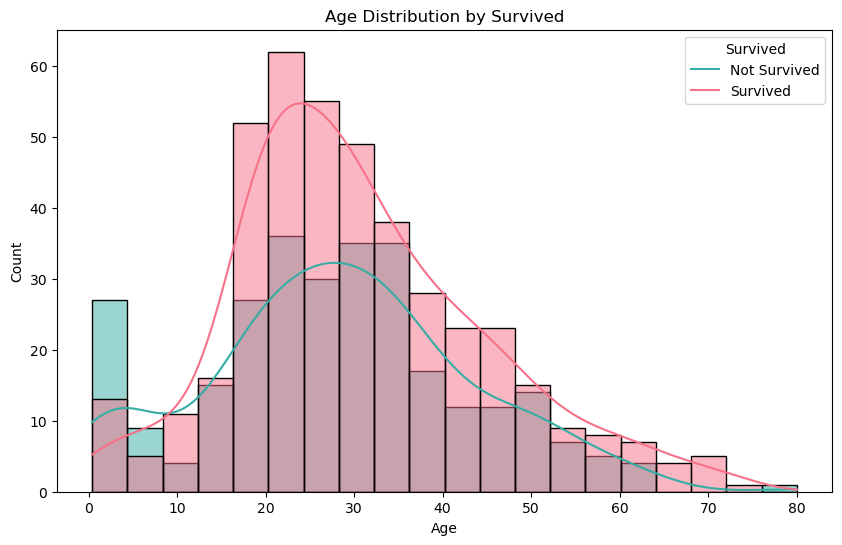

In [41]:
plt.figure(figsize=(10,6))
sns.histplot(
    data=train_df,
    x='Age',
    hue='Survived',
    kde=True,
    bins=20,
    palette='husl'
)
plt.title('Age Distribution by Survived')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(
    title='Survived',
    labels=['Not Survived', 'Survived']
)
plt.show()

# Histogram plot : Fare Distribution by Survived
The resulting plot will show a histogram of the 'Fare' distribution, with the KDE overlaid, and the bars will be differentiated by color, representing the 'Not Survived' and 'Survived' groups. The plot provides insights into the fare distribution of passengers who survived and those who did not, allowing us to observe any patterns or trends related to fare and survival outcomes.

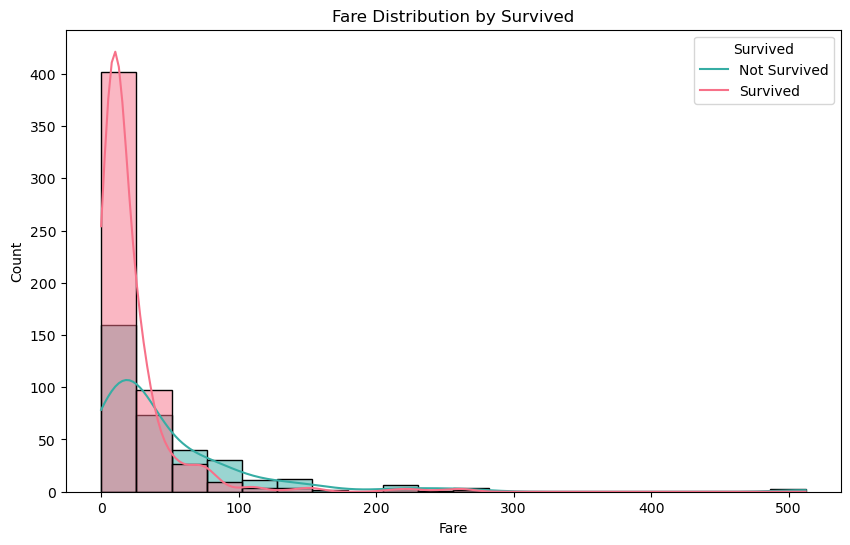

In [42]:
plt.figure(figsize=(10,6))
sns.histplot(
    data=train_df,
    x='Fare',
    hue='Survived',
    kde=True,
    bins=20,
    palette='husl'
)
plt.title('Fare Distribution by Survived')
plt.xlabel('Fare')
plt.ylabel('Count')
plt.legend(
    title='Survived',
    labels=['Not Survived', 'Survived']
)
plt.show()

## Barplot : Survival Rate by Number of Siblings/Spouses (SibSp) and Number of Parents/Children (Parch)
The resulting bar plot will show the survival rate for different combinations of the number of siblings/spouses and the number of parents/children. The plot can help identify any patterns or trends related to the family size and survival rate, giving insights into how these factors might have affected the chances of survival during the event under consideration.

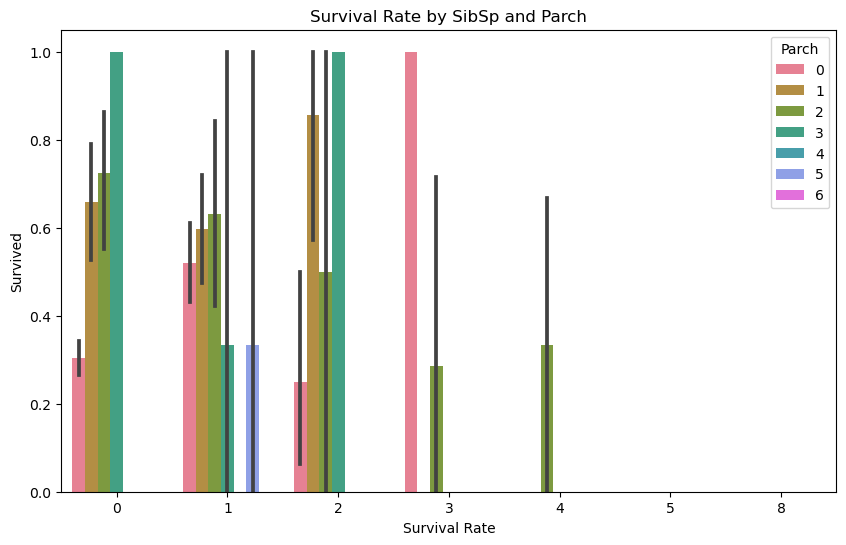

In [43]:
plt.figure(figsize=(10,6))
sns.barplot(
    x='SibSp',
    y='Survived',
    hue='Parch',
    data=train_df,
    palette='husl'
)
plt.title('Survival Rate by SibSp and Parch')
plt.xlabel('Siblings/Spouses (SibSp)')
plt.xlabel('Survival Rate')
plt.legend(
    title='Parch',
    loc='upper right'
)
plt.show()

## Scatter plot : Survival Rate by Age and Pclass
The resulting scatter plot will show data points representing the combination of age and passenger class, with colors indicating the survival outcome. The plot can help us observe any patterns or trends related to age, passenger class, and survival rate, providing insights into how these factors might be associated with the chances of survival during the event under consideration.

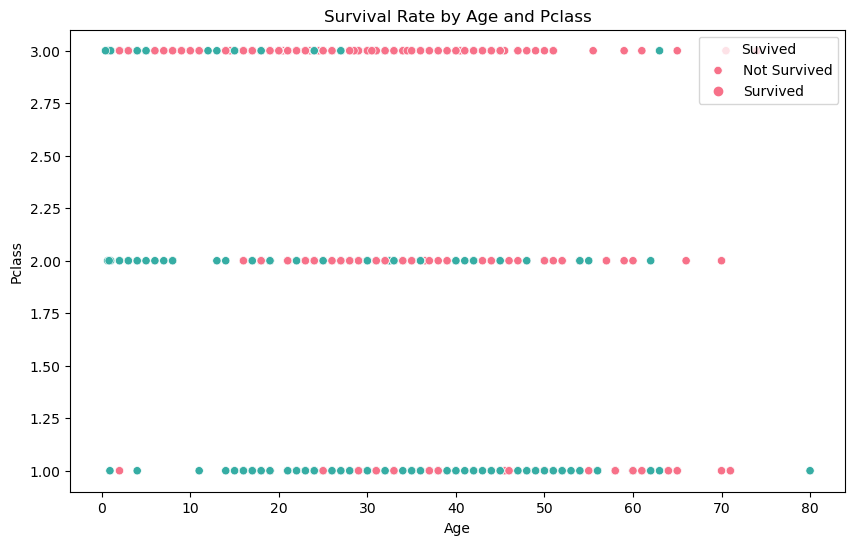

In [44]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=train_df,
    x='Age',
    y='Pclass',
    hue='Survived',
    palette='husl'
)
plt.title('Survival Rate by Age and Pclass')
plt.xlabel('Age')
plt.ylabel('Pclass')
plt.legend(
    title='Suvived',
    labels=['Not Survived', 'Survived'],
    loc='upper right'
)
plt.show()


## Scatter plot : Survival Rate by Fare and Embarked
The resulting scatter plot will show data points representing the combination of fare and port of embarkation, with colors indicating the survival outcome. The plot can help us observe any patterns or trends related to fare, port of embarkation, and survival rate, providing insights into how these factors might be associated with the chances of survival during the event under consideration.

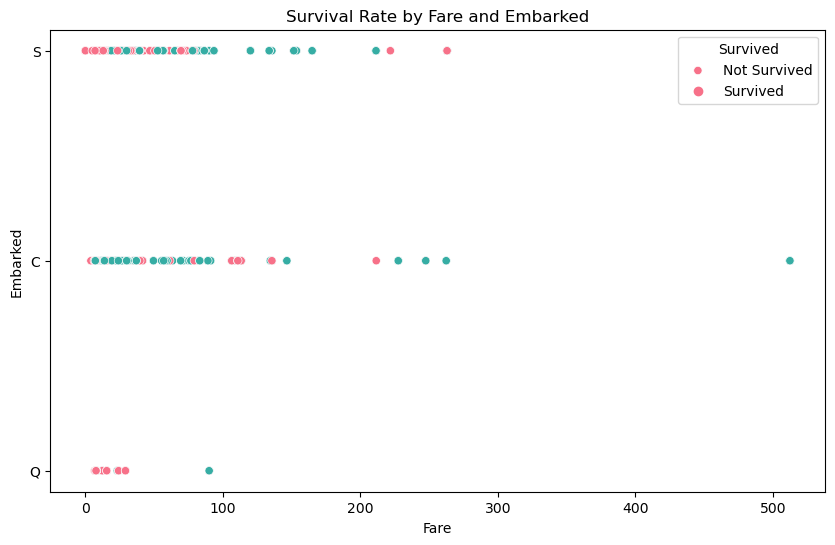

In [45]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=train_df,
    x='Fare',
    y='Embarked',
    hue='Survived',
    palette='husl'
)
plt.title('Survival Rate by Fare and Embarked')
plt.xlabel('Fare')
plt.ylabel('Embarked')
plt.legend(
    title='Survived',
    labels=['Not Survived', 'Survived'],
    loc='upper right'
)
plt.show()

# Data Preprocessing

## Handle missing or null values

In [46]:
#Checing missing or null values
print(train_df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [47]:
print(test_df.isnull().sum())

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [48]:
#For simplicity, just fill missing age values with the median age
train_df['Age'].fillna(
    train_df['Age'].median(),
    inplace=True
)

test_df['Age'].fillna(
    test_df['Age'].median(),
    inplace=True
)

#Drop 'Cabin' column
train_df.drop(
    'Cabin',
    axis=1,
    inplace=True
)

test_df.drop(
    'Cabin',
    axis=1,
    inplace=True
)

#Fill missing 'Embarked' values with most frequent value
most_frequent_embarked = train_df['Embarked'].mode()[0]
train_df['Embarked'].fillna(
    most_frequent_embarked,
    inplace=True
)

#Fill missing 'Fare' values with median fare in test_df
test_df['Fare'].fillna(
    test_df['Fare'].median(),
    inplace=True
)

# Features Engineering
This feature engineering step aims to create a new categorical feature ('Title') that can potentially contribute to the predictive power of the machine learning model. By encoding the titles as separate categories, the model can learn patterns and relationships between titles and survival, leading to improved performance in predicting survival outcomes.

## Extract titles from names

In [49]:
train_df['Title'] = train_df['Name'].str.extract(
    ' ([A-Za-z]+)\.',
    expand=False
)

test_df['Title'] = test_df['Name'].str.extract(
    ' ([A-Za-z]+)\.',
    expand=False
)

In [50]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr


In [51]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,Mrs
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,Mr
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,Mrs


## Group uncommon titles into 'Rare' and map various titles to numeric values

In [52]:
title_mapping = {
    'Mr': 0,'Miss' : 1,'Mrs' : 2,'Master' : 3,'Dr' : 4, 'Rev' : 4,
    'Mlle' :1, 'Major' : 4, 'Col' : 4, 'Sir' : 4, 'Ms' : 2, 'Countess' : 2,
    'Mme' : 2, 'Capt' : 4, 'Lady' : 2, 'Don' : 4, 'Jonkheer' : 4
}
train_df['Title'] = train_df['Title'].map(title_mapping)
test_df['Title'] = test_df['Title'].map(title_mapping)

## Drop unnecessary columns (e.g., 'Name','Ticket',etc)

In [53]:
train_df.drop(
    ['Name', 'Ticket', 'PassengerId'],
    axis=1,
    inplace=True
)

test_df.drop(
    ['Name', 'Ticket', 'PassengerId'],
    axis=1,
    inplace=True
)


## Convert categorical variables into dummy/indicator variables

In [54]:
train_df = pd.get_dummies(
    train_df,
    columns=['Sex', 'Embarked'],
    drop_first=True
)

test_df = pd.get_dummies(
    test_df,
    columns=['Sex', 'Embarked'],
    drop_first=True
)

# Model Training and Evaluation

## Split train dataset into features (X) and target (y)

In [55]:
X = train_df.drop('Survived', axis=1)
y = train_df['Survived']

## Split data into training and validation sets

In [56]:
X_train, X_valid, y_train, y_valid = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)

## Initialize and train RandomForestClassifier

In [57]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

## Make prediction on the validation set

In [58]:
y_pred = rf_model.predict(X_valid)

## Evaluate the model

In [59]:
print('Accuracy', accuracy_score(y_valid, y_pred))
print(classification_report(y_valid, y_pred))
print('Confusion Matrix :')
print(confusion_matrix(y_valid, y_pred))

Accuracy 0.8379888268156425
              precision    recall  f1-score   support

           0       0.85      0.88      0.86       105
           1       0.82      0.78      0.80        74

    accuracy                           0.84       179
   macro avg       0.83      0.83      0.83       179
weighted avg       0.84      0.84      0.84       179

Confusion Matrix :
[[92 13]
 [16 58]]


The provided information shows the evaluation metrics and confusion matrix for a machine learning model's performance in predicting survival outcomes (0: Not Survived, 1: Survived) on a test dataset of 179 samples.

1.     Accuracy: The accuracy of the model is 0.8379888268156425, which means that approximately 83.8% of the predictions made by the model are correct.

2.     Precision: Precision is a metric that measures the proportion of true positive predictions (correctly predicted Survived) over the total predicted positive instances (predicted as Survived). The precision for class 0 (Not Survived) is 0.85, and the precision for class 1 (Survived) is 0.82.

3.     Recall: Recall (also called sensitivity or true positive rate) is a metric that measures the proportion of true positive predictions (correctly predicted Survived) over the total actual positive instances (ground truth Survived). The recall for class 0 is 0.88, and the recall for class 1 is 0.78.

4.     F1-score: The F1-score is the harmonic mean of precision and recall and is used to balance precision and recall in cases where they have an inverse relationship. The F1-score for class 0 is 0.86, and the F1-score for class 1 is 0.80.

5.     Support: Support represents the number of occurrences of each class in the test dataset. For class 0, the support is 105, and for class 1, the support is 74.

6.     Macro Average: The macro average takes the average of precision, recall, and F1-score across both classes. The macro-average precision, recall, and F1-score are all approximately 0.83.

7.     Weighted Average: The weighted average calculates the metrics, taking into account the number of samples for each class. The weighted average precision, recall, and F1-score are all approximately 0.84.

8.     Confusion Matrix: The confusion matrix is a tabular representation that shows the number of true positive (TP), true negative (TN), false positive (FP), and false negative (FN) predictions. It provides a more detailed understanding of the model's performance. In this case:
*         True Positive (TP): 58 passengers were correctly predicted as 'Survived.'
*         True Negative (TN): 92 passengers were correctly predicted as 'Not Survived.'
*         False Positive (FP): 13 passengers were incorrectly predicted as 'Survived' when they actually 'Not Survived.'
*         False Negative (FN): 16 passengers were incorrectly predicted as 'Not Survived' when they actually 'Survived.'

Overall, the model seems to have performed reasonably well, with a good balance between precision and recall for both classes.

## Create a SimpleImputer object to fill missing values with the median

In [60]:
imputer = SimpleImputer(strategy='median')

## Fit and transform test_df using the imputer

In [62]:
test_df_imputed = pd.DataFrame(
    imputer.fit_transform(test_df),
    columns=test_df.columns
)

## Make prediction on test set

In [63]:
test_predictions = rf_model.predict(test_df_imputed)

## Prepare submission dataframe

In [64]:
submission_df = pd.DataFrame(
    {
        'PassengerId': gender_submission_df['PassengerId'],
        'Survived': test_predictions
    }
)

## Save the prediction to CSV file for submission

In [65]:
submission_df.to_csv('submission.csv', index=False)